In [14]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import numpy as np
import rfi
import turbo_seti
import pandas as pd
import BaselineRemoval
import scipy
import os
import matplotlib
from astropy.time import Time
from astropy import units as u
import ast
from collections import Counter

In [5]:
def MJD_time(w):
    for key, val in w.file_header.items():
        if key == 'src_raj':
            val = val.to_string(unit=u.hour, sep=':')
        if key == 'src_dej':
            val = val.to_string(unit=u.deg, sep=':')
        if key in ('foff', 'fch1'):
            val *= u.MHz
        if key == 'tstart':
            #print("%16s : %32s" % ("tstart (ISOT)", Time(val, format='mjd').isot))
            key = "tstart (MJD)"
    return  Time(val, format='mjd').isot

In [6]:
path1='data/BR/'
path2='data/SR/'
files1=os.listdir(path1)
files2=os.listdir(path2)
wf1=[]
wf2=[]
for i in files1:
    wf1.append(Waterfall(path1+i))
for i in files2:
    wf2.append(Waterfall(path2+i))
wf=wf1+wf2
len(wf)

76

In [7]:
time_order=[]
for i in wf:
    time_order.append([i.file_header.get('tstart'),i])
time_order.sort()
wf=[]
for i in time_order:
    wf.append(i[1])

In [16]:
len(need_to_flip)

14

In [8]:
plt.figure(dpi=150)
for i in wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    plt.plot(f,p)
    plt.ylim(-100,5000)
    #plt.yscale('log')

In [9]:
j=0
plt.figure(dpi=150)
for i in wf:
    if j in np.arange(0,14,1):
        f,p,base=rfi.base(i,flip=True)
        #test=rfi.intersection(i,multi=multi,flip=True)
    else:
        f,p,base=rfi.base(i)
        #test=rfi.intersection(i,multi=multi)
#     f,p,base=rfi.base(i)
    plt.plot(f,p/np.linalg.norm(p))
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
    plt.grid()
    plt.grid(which='minor',color='whitesmoke')
    #plt.xlim(544,1712)
    #plt.yscale('log')
    #plt.legend()
    j+=1
# line=[[650,660],[700,720],[840,880],[930,960],[1020,1050],[1160,1240],[1300,1380],[1560,1600]]
# for i in line:
#     plt.bar((i[1]+i[0])/2,1.0,width=i[1]-i[0],color='w',edgecolor='k',hatch='/',alpha=0.5)
plt.xlabel('Frequecny(MHz)')
plt.ylim(-0.01,0.2)
# plt.savefig('plots/after_mid/all_fitting_BR.pdf',bbox_inches = 'tight')
# plt.close()

(-0.01, 0.2)

In [12]:
yticks=[]
for i in wf:
    if (Time(i.file_header.get('tstart'), format='mjd').isot)[:10] not in yticks:
        yticks.append((Time(i.file_header.get('tstart'), format='mjd').isot)[:10])
y_loc=[0]
new_wf=[]
for i in wf:
    new_wf.append(Time(i.file_header.get('tstart'), format='mjd').isot[:10])
test_y=Counter(new_wf)
for key,value in test_y.items():
    y_loc.append(value+y_loc[-1])
y_loc.remove(76)

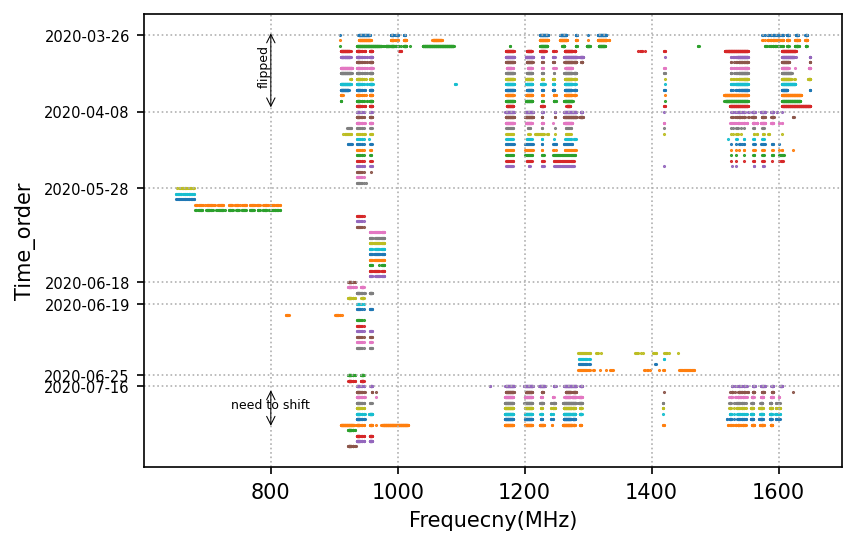

In [17]:
j=0
plt.figure(dpi=150)
for i in wf:
    maxi=np.amax(i.get_power()[1])
    multi=1.0
    if maxi<10000:
        multi=multi/10
    if j in np.arange(0,14,1):
        fi=rfi.intersection(i,multi=multi,flip=True)
    else:
        fi=rfi.intersection(i,multi=multi)
#     fi=rfi.intersection(i,multi=multi)
#     if j in np.arange(0,14,1):
#         fi=np.flip(fi)
    if j in range(66,72):
        index=np.where(fi>1100)
        fi[index]=fi[index]+250*i.header['foff']
    if j in range(67,71):
        index=np.where(fi>1350)
        fi[index]=fi[index]+250*i.header['foff']
    y=np.zeros(fi.shape)
    y=np.where(y==0,j,y)
    plt.scatter(fi,y,s=0.25)
    j+=1
plt.gca().annotate('',xy=(800,-1),xytext=(800,14),arrowprops=dict(arrowstyle="<->",connectionstyle="arc3", color='k', lw=0.5))
plt.text(790,9,'flipped',ha='center',color='k',rotation=90,fontsize=6)
plt.gca().annotate('',xy=(800,64),xytext=(800,72),arrowprops=dict(arrowstyle="<->",connectionstyle="arc3", color='k', lw=0.5))
plt.text(800,68,'need to shift',ha='center',color='k',fontsize=6)
plt.gca().invert_yaxis()
plt.xlabel('Frequecny(MHz)')
plt.ylabel('Time_order')
plt.yticks(ticks=y_loc,labels=yticks,fontsize=7)
#plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
plt.grid(linestyle=':')
#plt.grid(which='minor',color='gainsboro')
# plt.savefig('plots/after_mid/labelled_overall.pdf')

In [6]:
part1=pd.read_csv('part_1.csv')
part2=pd.read_csv('part_2.csv')
data=pd.concat([part1,part2],ignore_index=True)

In [7]:
data

,index,source_name,time(MJD),src_raj,f_range(MHz),RFI(MHz)
0,46,J0918-1205,2020-07-16T14:37:11.000,8h26m01.91s,"(910.126953125, 1649.931640625)","[[910.126953125, 940.4296875], [941.056640625,..."
1,47,J0918-1205_offset,2020-07-16T14:17:26.000,8h26m01.91s,"(910.126953125, 1649.931640625)","[[910.126953125, 934.369140625], [934.78710937..."
2,48,Unknown,2020-04-08T17:52:01.000,8h36m01.6s,"(910.3359375, 1649.3046875)","[[935.4140625, 939.59375], [941.265625, 941.26..."
3,49,Unknown,2020-04-08T17:44:41.000,4h08m27.24s,"(910.3359375, 1649.3046875)","[[935.4140625, 939.59375], [941.265625, 941.26..."
4,50,Unknown,2020-04-08T17:44:11.000,4h08m27.24s,"(910.3359375, 1649.3046875)","[[935.4140625, 939.59375], [941.265625, 941.26..."
...,...,...,...,...,...,...
71,36,J0825-5010_offset,2020-05-28T17:01:08.000,8h26m01.91s,"(680.0, 815.46875)","[[680.53125, 680.53125], [682.65625, 682.65625..."
72,37,J0825-5010_offset,2020-05-28T16:59:55.000,8h26m01.91s,"(680.0, 815.46875)","[[681.59375, 681.59375], [690.09375, 690.625],..."
73,38,J0825-5010_offset,2020-05-28T16:50:56.000,8h26m01.91s,"(650.25, 679.46875)","[[650.78125, 650.78125], [653.96875, 653.96875..."
74,39,J0825-5010_offset,2020-05-28T16:49:43.000,8h26m01.91s,"(650.25, 679.46875)","[[650.78125, 650.78125], [652.375, 652.375], [..."


In [16]:
len(wf)

76

In [2]:
test=[1,2,3,4]
test.pop()
test

[1, 2, 3]